# Assignment 2 - Gesture Based UI

In [254]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# CNN From Scratch - Default Image Colour
Image size = 128 x 128<br/>
Image colour = RGB<br/>



In [255]:
# Define constants
IMAGE_SIZE = (128, 128) #Image size of 128 x 128
BATCH_SIZE = 32
DATASET_PATH = "hagridset"
SEED = 399177 #G00399177

In [256]:
# This code sets up two TensorFlow Keras image datasets for training and validation/testing. The `train_dataset` is created from the 
# `DATASET_PATH` directory, with a 70/30 split for training and validation data. The `validation_and_test_dataset` is also created from
# the `DATASET_PATH` directory, with the same 70/30 split. The `test_dataset` is then created by taking the last 2/3 of the `validation_and_test_dataset`,
# and the `validation_dataset` is created by skipping the last 2/3 of the `validation_and_test_dataset`.
train_dataset = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE, validation_split=0.3
                                                           , subset='training', label_mode='categorical', 
                                                           seed=SEED, batch_size=BATCH_SIZE)

validation_and_test_dataset = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE, validation_split=0.3
                                                           , subset='validation',label_mode='categorical',
                                                           seed=SEED, batch_size=BATCH_SIZE)

val_batches = tf.data.experimental.cardinality(validation_and_test_dataset)

test_dataset = validation_and_test_dataset.take((2*val_batches) // 3)
validation_dataset = validation_and_test_dataset.skip((2*val_batches) // 3) 


Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [257]:
# Get the number of classes from the data generator
NUM_CLASSES = len(train_dataset.class_names)
print("Classes: ",NUM_CLASSES)

Classes:  18


In [258]:
# CNN model from scratch
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [259]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_24 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_76 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 32, 32, 64)      

In [260]:

# Configures an EarlyStopping callback for a Keras model.

# This callback monitors the validation loss during training and stops the training
# if the validation loss does not improve for 5 epochs. It also restores the
# weights of the model to the best performing weights during training.

# Args:
#     monitor (str): The metric to monitor for early stopping. In this case, it is
#         set to 'val_loss', which means the validation loss.
#     patience (int): The number of epochs to wait before stopping the training if
#         the monitored metric does not improve.
#     restore_best_weights (bool): If True, the model will be restored to the
#         weights that had the best value of the monitored metric.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [261]:
# Trains the model on the provided training dataset and evaluates it on the validation dataset. The training runs for 10 epochs and uses the provided callback function to monitor and control the training process.

# Parameters:
# - train_dataset (tf.data.Dataset): The training dataset.
# - validation_dataset (tf.data.Dataset): The validation dataset.
# - epochs (int): The number of training epochs.
# - callbacks (list): A list of callback functions to use during training.
history = model.fit(train_dataset,  validation_data=(validation_dataset), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - 191s 69ms/step - loss: 2.7773 - accuracy: 0.1010 - val_loss: 2.6388 - val_accuracy: 0.1389
Epoch 2/10
2755/2755 [==============================] - 178s 64ms/step - loss: 2.5650 - accuracy: 0.1677 - val_loss: 2.4759 - val_accuracy: 0.1934
Epoch 3/10
2755/2755 [==============================] - 188s 68ms/step - loss: 2.3971 - accuracy: 0.2239 - val_loss: 2.3312 - val_accuracy: 0.2451
Epoch 4/10
2755/2755 [==============================] - 185s 67ms/step - loss: 2.1780 - accuracy: 0.2930 - val_loss: 2.1107 - val_accuracy: 0.3205
Epoch 5/10
2755/2755 [==============================] - 190s 69ms/step - loss: 1.9870 - accuracy: 0.3506 - val_loss: 1.9271 - val_accuracy: 0.3754
Epoch 6/10
2755/2755 [==============================] - 184s 67ms/step - loss: 1.8359 - accuracy: 0.3995 - val_loss: 1.7830 - val_accuracy: 0.4127
Epoch 7/10
2755/2755 [==============================] - 197s 71ms/step - loss: 1.7097 - accuracy: 0.4369 - val_loss: 1

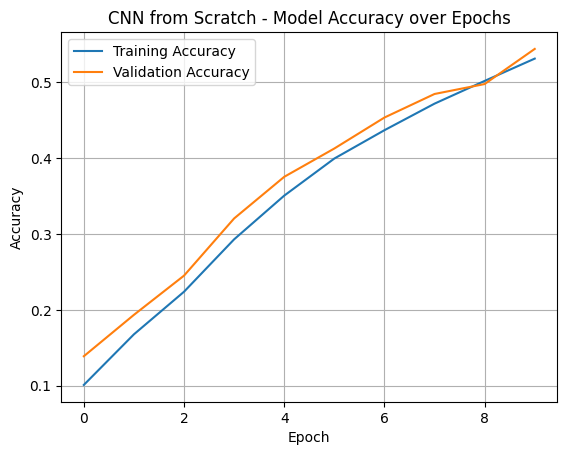

In [262]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN from Scratch - Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [263]:
# Evaluates the model on the test dataset and returns a dictionary of evaluation metrics.
model.evaluate(test_dataset, return_dict=True)

787/787 [==============================] - 17s 22ms/step - loss: 1.3881 - accuracy: 0.5455


{'loss': 1.3880572319030762, 'accuracy': 0.545465350151062}

In [264]:
class_names = train_dataset.class_names

# Prediction of My Hand Peace
my_image1 = np.array(Image.open("MyHandPeace.jpg").resize((IMAGE_SIZE[0],IMAGE_SIZE[1])))
my_image1 = my_image1.reshape(1,IMAGE_SIZE[0],IMAGE_SIZE[1],3)
prediction_of_my_image = model.predict(my_image1)
my_image1_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My hand Palm
my_image2 = np.array(Image.open("MyHandPalm.jpg").resize((IMAGE_SIZE[0],IMAGE_SIZE[1])))
my_image2 = my_image2.reshape(1,IMAGE_SIZE[0],IMAGE_SIZE[1],3)
prediction_of_my_image = model.predict(my_image2)
my_image2_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Stop 
my_image3 = np.array(Image.open("MyHandStop.jpg").resize((IMAGE_SIZE[0],IMAGE_SIZE[1])))
my_image3 = my_image3.reshape(1,IMAGE_SIZE[0],IMAGE_SIZE[1],3)
prediction_of_my_image = model.predict(my_image3)
my_image3_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Two Up
my_image4 = np.array(Image.open("MyHandTwoUp.jpg").resize((IMAGE_SIZE[0],IMAGE_SIZE[1])))
my_image4 = my_image4.reshape(1,IMAGE_SIZE[0],IMAGE_SIZE[1],3)
prediction_of_my_image = model.predict(my_image4)
my_image4_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Print the predicted class names
print("Predicted Class for MyHandPeace.jpg   (Should predict peace): ", my_image1_prediction)
print("Predicted Class for MyHandPalm.jpg     (Should predict Palm): ", my_image2_prediction)
print("Predicted Class for MyHandStop.jpg     (Should predict Stop): ", my_image3_prediction)
print("Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up): ", my_image4_prediction)


1/1 [==============================] - 0s 42ms/step
Predicted Class for MyHandPeace.jpg   (Should predict peace):  peace
Predicted Class for MyHandPalm.jpg     (Should predict Palm):  palm
Predicted Class for MyHandStop.jpg     (Should predict Stop):  stop
Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up):  two_up


# CNN from Scratch - RGB Images - More Convolutional Layers and Increased Filters

- The previous model doesn't have a great accuracy, lets try and improve it by adding some layers and increasing the filters in the convolutional layers

In [265]:
# Define constants
IMAGE_SIZE1 = (128, 128) #Image size of 128 x 128
BATCH_SIZE1 = 32
DATASET_PATH = "hagridset"
SEED = 399177 #G00399177

In [266]:
train_dataset1 = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE1, validation_split=0.3
                                                           , subset='training', label_mode='categorical', 
                                                           seed=SEED, batch_size=BATCH_SIZE1)

validation_and_test_dataset1 = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE1, validation_split=0.3
                                                           , subset='validation',label_mode='categorical',
                                                           seed=SEED, batch_size=BATCH_SIZE1)

val_batches1 = tf.data.experimental.cardinality(validation_and_test_dataset1)

test_dataset1 = validation_and_test_dataset1.take((2*val_batches1) // 3)
validation_dataset1 = validation_and_test_dataset1.skip((2*val_batches1) // 3) 


Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [267]:
# Get the number of classes from the data generator
NUM_CLASSES = len(train_dataset1.class_names)
print("Classes: ",NUM_CLASSES)

Classes:  18


In [268]:
# CNN model from scratch
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.Input(shape=(IMAGE_SIZE1[0], IMAGE_SIZE1[1],3)))
model1.add(layers.Rescaling(1./255))
model1.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(48, 3, padding='same', activation='relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.Conv2D(96, 3, padding='same', activation='relu'))
model1.add(layers.MaxPooling2D())
model1.add(layers.GlobalAveragePooling2D())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [269]:
#model1.fit(train_dataset1,  validation_data=(validation_dataset1), epochs=10, callbacks=[callback])
history1 = model1.fit(train_dataset1, validation_data=(validation_dataset1), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - 211s 76ms/step - loss: 2.7123 - accuracy: 0.1142 - val_loss: 2.5001 - val_accuracy: 0.1860
Epoch 2/10
2755/2755 [==============================] - 201s 73ms/step - loss: 2.0882 - accuracy: 0.3177 - val_loss: 1.7470 - val_accuracy: 0.4295
Epoch 3/10
2755/2755 [==============================] - 202s 73ms/step - loss: 1.4705 - accuracy: 0.5185 - val_loss: 1.2446 - val_accuracy: 0.5995
Epoch 4/10
2755/2755 [==============================] - 189s 69ms/step - loss: 1.1048 - accuracy: 0.6424 - val_loss: 0.9972 - val_accuracy: 0.6804
Epoch 5/10
2755/2755 [==============================] - 198s 72ms/step - loss: 0.8941 - accuracy: 0.7134 - val_loss: 0.8990 - val_accuracy: 0.7156
Epoch 6/10
2755/2755 [==============================] - 194s 70ms/step - loss: 0.7545 - accuracy: 0.7567 - val_loss: 0.7783 - val_accuracy: 0.7507
Epoch 7/10
2755/2755 [==============================] - 189s 69ms/step - loss: 0.6590 - accuracy: 0.7892 - val_loss: 0

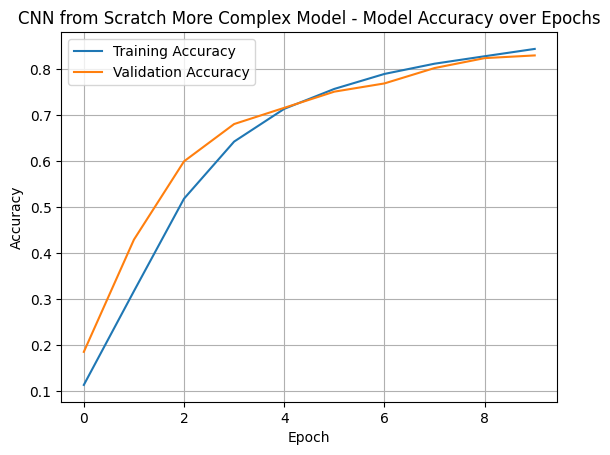

In [270]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN from Scratch More Complex Model - Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [271]:
model1.evaluate(test_dataset1, return_dict=True)

787/787 [==============================] - 17s 21ms/step - loss: 0.5385 - accuracy: 0.8312


{'loss': 0.5385039448738098, 'accuracy': 0.8311626315116882}

In [272]:
class_names = train_dataset1.class_names

# Prediction of My Hand Peace
my_image1 = np.array(Image.open("MyHandPeace.jpg").resize((IMAGE_SIZE1[0],IMAGE_SIZE1[1])))
my_image1 = my_image1.reshape(1,IMAGE_SIZE1[0],IMAGE_SIZE1[1],3)
prediction_of_my_image = model1.predict(my_image1)
my_image1_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My hand Palm
my_image2 = np.array(Image.open("MyHandPalm.jpg").resize((IMAGE_SIZE1[0],IMAGE_SIZE1[1])))
my_image2 = my_image2.reshape(1,IMAGE_SIZE1[0],IMAGE_SIZE1[1],3)
prediction_of_my_image = model1.predict(my_image2)
my_image2_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Stop 
my_image3 = np.array(Image.open("MyHandStop.jpg").resize((IMAGE_SIZE1[0],IMAGE_SIZE1[1])))
my_image3 = my_image3.reshape(1,IMAGE_SIZE1[0],IMAGE_SIZE1[1],3)
prediction_of_my_image = model1.predict(my_image3)
my_image3_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Two Up
my_image4 = np.array(Image.open("MyHandTwoUp.jpg").resize((IMAGE_SIZE1[0],IMAGE_SIZE1[1])))
my_image4 = my_image4.reshape(1,IMAGE_SIZE1[0],IMAGE_SIZE1[1],3)
prediction_of_my_image = model1.predict(my_image4)
my_image4_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Print the predicted class names
print("Predicted Class for MyHandPeace.jpg   (Should predict peace): ", my_image1_prediction)
print("Predicted Class for MyHandPalm.jpg     (Should predict Palm): ", my_image2_prediction)
print("Predicted Class for MyHandStop.jpg     (Should predict Stop): ", my_image3_prediction)
print("Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up): ", my_image4_prediction)


1/1 [==============================] - 0s 31ms/step
Predicted Class for MyHandPeace.jpg   (Should predict peace):  peace
Predicted Class for MyHandPalm.jpg     (Should predict Palm):  palm
Predicted Class for MyHandStop.jpg     (Should predict Stop):  stop
Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up):  two_up


# CNN from Scatch - Grayscale Images

In [273]:
# Define constants
IMAGE_SIZE2 = (128, 128) #Image size of 128 x 128
BATCH_SIZE2 = 32
DATASET_PATH = "hagridset"
SEED = 399177 #G00399177

In [274]:
# This code sets up two TensorFlow Keras image datasets for training and validation/testing. The `train_dataset` is created from the 
# `DATASET_PATH` directory, with a 70/30 split for training and validation data. The `validation_and_test_dataset` is also created from
# the `DATASET_PATH` directory, with the same 70/30 split. The `test_dataset` is then created by taking the last 2/3 of the `validation_and_test_dataset`,
# and the `validation_dataset` is created by skipping the last 2/3 of the `validation_and_test_dataset`.
train_dataset_grayscale = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            color_mode = "grayscale",
                                                            image_size=IMAGE_SIZE2, validation_split=0.3
                                                           , subset='training', label_mode='categorical', 
                                                           seed=SEED, batch_size=BATCH_SIZE2)
NUM_CLASSES = len(train_dataset_grayscale.class_names)
CLASS_NAMES = train_dataset_grayscale.class_names

validation_and_test_dataset_grayscale = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            color_mode="grayscale",
                                                            image_size=IMAGE_SIZE2, validation_split=0.3
                                                           , subset='validation',label_mode='categorical',
                                                           seed=SEED, batch_size=BATCH_SIZE2)

val_batches = tf.data.experimental.cardinality(validation_and_test_dataset_grayscale)

test_dataset_grayscale = validation_and_test_dataset_grayscale.take((2*val_batches) // 3)

validation_dataset_grayscale = validation_and_test_dataset_grayscale.skip((2*val_batches) // 3)

Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [275]:
# CNN model from scratch
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=(IMAGE_SIZE2[0], IMAGE_SIZE2[1],1)))
model2.add(layers.Rescaling(1./255))
model2.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(48, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(96, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


flatten had it over fitting

In [276]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [277]:
history2 = model2.fit(train_dataset_grayscale,  validation_data=(validation_dataset_grayscale), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - 177s 63ms/step - loss: 2.7281 - accuracy: 0.1129 - val_loss: 2.4724 - val_accuracy: 0.1898
Epoch 2/10
2755/2755 [==============================] - 162s 59ms/step - loss: 2.2970 - accuracy: 0.2454 - val_loss: 2.0799 - val_accuracy: 0.3105
Epoch 3/10
2755/2755 [==============================] - 163s 59ms/step - loss: 1.9183 - accuracy: 0.3679 - val_loss: 1.7543 - val_accuracy: 0.4289
Epoch 4/10
2755/2755 [==============================] - 161s 58ms/step - loss: 1.5968 - accuracy: 0.4783 - val_loss: 1.5541 - val_accuracy: 0.5032
Epoch 5/10
2755/2755 [==============================] - 162s 59ms/step - loss: 1.3596 - accuracy: 0.5612 - val_loss: 1.3641 - val_accuracy: 0.5615
Epoch 6/10
2755/2755 [==============================] - 163s 59ms/step - loss: 1.1810 - accuracy: 0.6201 - val_loss: 1.1598 - val_accuracy: 0.6276
Epoch 7/10
2755/2755 [==============================] - 161s 58ms/step - loss: 1.0572 - accuracy: 0.6617 - val_loss: 1

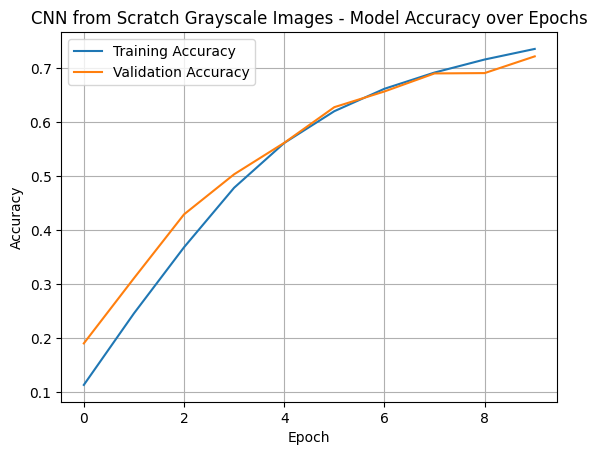

In [278]:
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN from Scratch Grayscale Images - Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [279]:
model2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_26 (Rescaling)    (None, 128, 128, 1)       0         
                                                                 
 conv2d_83 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 32, 32, 48)      

In [280]:
model2.evaluate(test_dataset_grayscale, return_dict=True)

787/787 [==============================] - 36s 45ms/step - loss: 0.8787 - accuracy: 0.7212


{'loss': 0.8787032961845398, 'accuracy': 0.7212119102478027}

In [1]:
# Load and preprocess the image
my_image = Image.open("MyHandStop.jpg").resize((IMAGE_SIZE2[0], IMAGE_SIZE2[1]))

# Convert the image to grayscale if necessary
my_image = my_image.convert("L")

# Convert the image to numpy array
my_image_array = np.array(my_image)

# Expand dimensions to match the model's input shape
my_image_array = np.expand_dims(my_image_array, axis=0)
my_image_array = np.expand_dims(my_image_array, axis=-1)

# Predict the class probabilities
prediction_of_my_image = model2.predict(my_image_array)

# Get the index of the predicted class (the class with the highest probability)
predicted_class_index = np.argmax(prediction_of_my_image)

# Map the predicted class index to the corresponding class name
predicted_class_name = CLASS_NAMES[predicted_class_index]

print("Predicted class:", predicted_class_name)

NameError: name 'Image' is not defined

# CNN from Scratch - Smaller Images, Data Augmentation, Different Batch Size, 

In [282]:
# Define constants
IMAGE_SIZE3 = (64, 64) #Image size of 128 x 128
BATCH_SIZE3 = 32
DATASET_PATH = "hagridset"
SEED = 399177 #G00399177

In [283]:
# This code sets up two TensorFlow Keras image datasets for training and validation/testing. The `train_dataset` is created from the 
# `DATASET_PATH` directory, with a 70/30 split for training and validation data. The `validation_and_test_dataset` is also created from
# the `DATASET_PATH` directory, with the same 70/30 split. The `test_dataset` is then created by taking the last 2/3 of the `validation_and_test_dataset`,
# and the `validation_dataset` is created by skipping the last 2/3 of the `validation_and_test_dataset`.
train_dataset3 = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE3, validation_split=0.3
                                                           , subset='training', label_mode='categorical', 
                                                           seed=SEED, batch_size=BATCH_SIZE3)
NUM_CLASSES = len(train_dataset_grayscale.class_names)
CLASS_NAMES = train_dataset_grayscale.class_names

validation_and_test_dataset3 = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                            shuffle=True,
                                                            image_size=IMAGE_SIZE3, validation_split=0.3
                                                           , subset='validation',label_mode='categorical',
                                                           seed=SEED, batch_size=BATCH_SIZE3)

val_batches3 = tf.data.experimental.cardinality(validation_and_test_dataset)

test_dataset3 = validation_and_test_dataset3.take((2*val_batches3) // 3)

validation_dataset3 = validation_and_test_dataset3.skip((2*val_batches3) // 3)

Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [284]:
data_augmentation_layers = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

In [285]:
# CNN model from scratch
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.Input(shape=(IMAGE_SIZE3[0], IMAGE_SIZE3[1],3)))
model3.add(layers.Rescaling(1./255))
model3.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model3.add(layers.MaxPooling2D())
model3.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model3.add(layers.MaxPooling2D())
model3.add(layers.Conv2D(48, 3, padding='same', activation='relu'))
model3.add(layers.MaxPooling2D())
model3.add(layers.Conv2D(96, 3, padding='same', activation='relu'))
model3.add(layers.MaxPooling2D())
model3.add(layers.GlobalAveragePooling2D())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [286]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [287]:
history3 = model3.fit(train_dataset3,  validation_data=(validation_dataset3), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - 178s 64ms/step - loss: 2.8759 - accuracy: 0.0645 - val_loss: 2.7411 - val_accuracy: 0.1155
Epoch 2/10
2755/2755 [==============================] - 162s 59ms/step - loss: 2.3498 - accuracy: 0.2400 - val_loss: 1.8935 - val_accuracy: 0.3865
Epoch 3/10
2755/2755 [==============================] - 163s 59ms/step - loss: 1.5476 - accuracy: 0.5000 - val_loss: 1.2591 - val_accuracy: 0.5924
Epoch 4/10
2755/2755 [==============================] - 162s 59ms/step - loss: 1.1445 - accuracy: 0.6300 - val_loss: 1.0362 - val_accuracy: 0.6659
Epoch 5/10
2755/2755 [==============================] - 165s 60ms/step - loss: 0.9470 - accuracy: 0.6935 - val_loss: 0.9144 - val_accuracy: 0.7001
Epoch 6/10
2755/2755 [==============================] - 163s 59ms/step - loss: 0.8214 - accuracy: 0.7345 - val_loss: 0.8127 - val_accuracy: 0.7349
Epoch 7/10
2755/2755 [==============================] - 163s 59ms/step - loss: 0.7294 - accuracy: 0.7644 - val_loss: 0

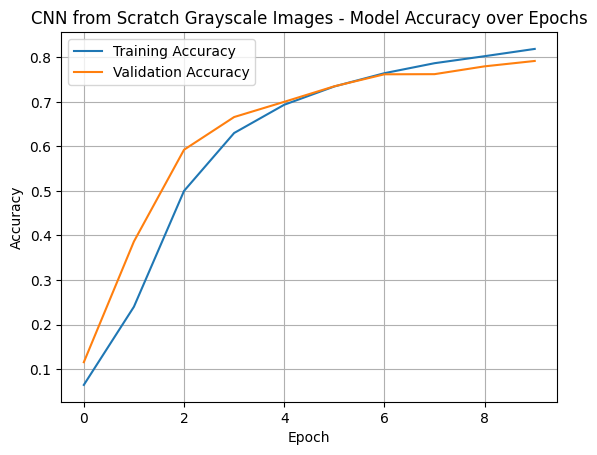

In [288]:
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN from Scratch Grayscale Images - Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [289]:
model3.evaluate(test_dataset3, return_dict=True)

787/787 [==============================] - 36s 45ms/step - loss: 0.6494 - accuracy: 0.7940


{'loss': 0.6494028568267822, 'accuracy': 0.7939962148666382}

In [290]:
class_names = train_dataset3.class_names

# Prediction of My Hand Peace
my_image1 = np.array(Image.open("MyHandPeace.jpg").resize((IMAGE_SIZE3[0],IMAGE_SIZE3[1])))
my_image1 = my_image1.reshape(1,IMAGE_SIZE3[0],IMAGE_SIZE3[1],3)
prediction_of_my_image = model3.predict(my_image1)
my_image1_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My hand Palm
my_image2 = np.array(Image.open("MyHandPalm.jpg").resize((IMAGE_SIZE3[0],IMAGE_SIZE3[1])))
my_image2 = my_image2.reshape(1,IMAGE_SIZE3[0],IMAGE_SIZE3[1],3)
prediction_of_my_image = model3.predict(my_image2)
my_image2_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Stop 
my_image3 = np.array(Image.open("MyHandStop.jpg").resize((IMAGE_SIZE3[0],IMAGE_SIZE3[1])))
my_image3 = my_image3.reshape(1,IMAGE_SIZE3[0],IMAGE_SIZE3[1],3)
prediction_of_my_image = model3.predict(my_image3)
my_image3_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Prediction of My Hand Two Up
my_image4 = np.array(Image.open("MyHandTwoUp.jpg").resize((IMAGE_SIZE3[0],IMAGE_SIZE3[1])))
my_image4 = my_image4.reshape(1,IMAGE_SIZE3[0],IMAGE_SIZE3[1],3)
prediction_of_my_image = model3.predict(my_image4)
my_image4_prediction = pd.DataFrame(prediction_of_my_image, columns=class_names).idxmax(axis=1).iloc[0]

# Print the predicted class names
print("Predicted Class for MyHandPeace.jpg   (Should predict peace): ", my_image1_prediction)
print("Predicted Class for MyHandPalm.jpg     (Should predict Palm): ", my_image2_prediction)
print("Predicted Class for MyHandStop.jpg     (Should predict Stop): ", my_image3_prediction)
print("Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up): ", my_image4_prediction)


1/1 [==============================] - 0s 29ms/step
Predicted Class for MyHandPeace.jpg   (Should predict peace):  peace
Predicted Class for MyHandPalm.jpg     (Should predict Palm):  four
Predicted Class for MyHandStop.jpg     (Should predict Stop):  stop
Predicted Class for MyHandTwoUp.jpg  (Should predict Two Up):  two_up


# Transfer Learning

In [291]:
inputs = tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3))

In [292]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3),
    include_top=False)
base_model.trainable = False
x = data_augmentation_layers(inputs)
x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES)(x)
model = tf.keras.Model(inputs, outputs)

In [293]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [294]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [295]:
model.fit(train_dataset,  validation_data=(validation_dataset_grayscale), epochs=10, callbacks=[callback])

Epoch 1/10
2755/2755 [==============================] - ETA: 0s - loss: 2.2644 - accuracy: 0.3097WARNING:tensorflow:Model was constructed with shape (None, 128, 128, 3) for input KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_33'), name='input_33', description="created by layer 'input_33'"), but it was called on an input with incompatible shape (None, 128, 128, 1).


ValueError: in user code:

    File "c:\Users\conor\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\conor\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\conor\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\conor\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\conor\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\conor\miniconda3\envs\py310\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "vgg16" "                 f"(type Functional).
    
    Input 0 of layer "block1_conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 128, 128, 1)
    
    Call arguments received by layer "vgg16" "                 f"(type Functional):
      • inputs=tf.Tensor(shape=(None, 128, 128, 1), dtype=float32)
      • training=False
      • mask=None


In [ ]:
model.evaluate(test_dataset_grayscale, return_dict=True)

epoch ten transfer learning: val_accuracy: 0.3462